In [1]:
# 패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as s
import seaborn as sns
import math
import matplotlib.font_manager as fm
import warnings
import graphviz
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mse

from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #예측/회귀
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.feature_selection import RFE
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from datetime import date
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report

path='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop=fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font',family = fontprop)
matplotlib.rc('axes', unicode_minus = False)

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 400

from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv("../2/SCALE불량.csv", encoding = "euc-kr")

In [7]:
A = df.query('ROLLING_TEMP_T5>1000')
B = A.groupby("STEEL_KIND")
B.count()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
STEEL_KIND,,,,,,,,,,,,,,,,,,,,
C0,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
C1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
T7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
T8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
#전처리
A = []
for i in df['STEEL_KIND']:
    if i == "C0" :
        A.append(0)
    elif i == "C1":
        A.append(1)
    elif i == "C3":
        A.append(2)
    elif i == "T0":
        A.append(3)
    elif i == "T1":
        A.append(4)
    elif i == "T3":
        A.append(5)
    elif i == "T5":
        A.append(6)
    elif i == "T7":
        A.append(7)
    else :
        A.append(8)
df['STEEL_KIND'] = A

A = []
for i in df['FUR_NO']:
    if i == "1호기" :
        A.append(1)
    elif i == "2호기":
        A.append(2)
    else :
        A.append(3)
df['FUR_NO'] = A

A = []
for i in df['FUR_NO_ROW']:
    if i == "1열" :
        A.append(1)
    else:
        A.append(2)
df['FUR_NO_ROW'] = A

A = []
for i in df['HSB']:
    if i == "적용" :
        A.append(1)
    else:
        A.append(0)
df['HSB'] = A

A = []
for i in df['WORK_GR']:
    if i == "1조" :
        A.append(1)
    elif i == "2조":
        A.append(2)
    elif i == "3조":
        A.append(3)
    else :
        A.append(4)
df['WORK_GR'] = A

A = []
for i in df['SCALE']:
    if i == "양품" :
        A.append(0)
    else :
        A.append(1)
df['SCALE'] = A

<AxesSubplot:xlabel='FUR_NO_ROW', ylabel='Count'>

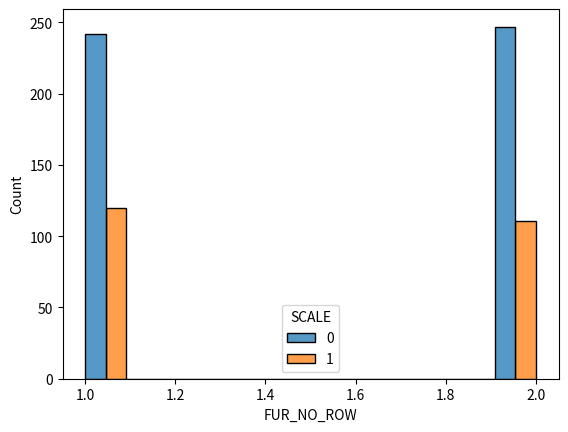

In [9]:
sns.histplot(data = df, x='FUR_NO_ROW',hue = 'SCALE', multiple='dodge' )

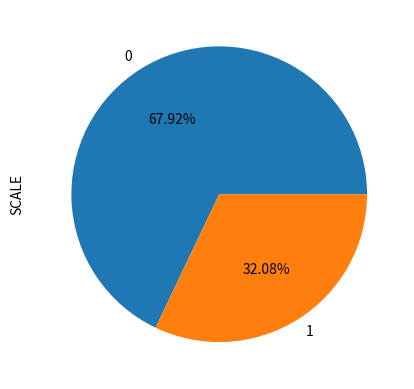

In [10]:
df_count = df['SCALE'].value_counts()
df_count.plot.pie(autopct = "%.2f%%");

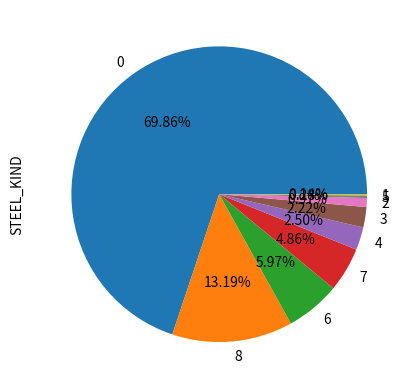

In [11]:
df_count = df['STEEL_KIND'].value_counts()
df_count.plot.pie(autopct = "%.2f%%");